# Capstone Project 205

In [83]:
import os
import io
import requests
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn as sns
sns.set_style(style='darkgrid')
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import re
%matplotlib inline


## Overview

In [84]:
#cp = pd.read_csv('https://data.montgomerycountymd.gov/resource/i26v-w6bd.csv')
cp = pd.read_csv('Commercial_Permits (4).csv')
#that the data only loads up a thousand rows

In [85]:
cp.tail()

,Permit Number,Status,Street Number,Pre-direction,Street Name,Street Suffix,Post-direction,City,State,ZIP code,Added Date,Issue Date,Final Date,Building Area,Declared Valuation,Description,Application Type,Work Type,Use Code,Location
28801,744532,Finaled,9704,NaN,MEDICAL CENTER,DR,NaN,ROCKVILLE,MD,20850.0,02/12/2016,03/14/2016,03/21/2017,27000.0,1162792.0,Interior Alterations : including systems Furni...,COMMERCIAL BUILDING,ALTER,BUSINESS BUILDING,"9704 MEDICAL CENTER DR\nROCKVILLE, MD 20850\n(..."
28802,745364,Finaled,4800,NaN,HAMPDEN,LN,NaN,BETHESDA,MD,20814.0,02/22/2016,04/29/2016,08/18/2016,11027.0,527683.0,Partial renovation of the 3rd Floor Revision 0...,COMMERCIAL BUILDING,ALTER,BUSINESS BUILDING,"4800 HAMPDEN LN\nBETHESDA, MD 20814\n(38.98271..."
28803,745969,Finaled,4806,NaN,MONTGOMERY,LN,NaN,BETHESDA,MD,20814.0,02/25/2016,03/04/2016,05/24/2016,700.0,8000.0,Restore and repair -Girder Truss,COMMERCIAL BUILDING,RESTORE AND / OR REPAIR,TOWNHOUSE,"4806 MONTGOMERY LN\nBETHESDA, MD 20814\n(38.98..."
28804,744012,Open,12510,NaN,PENNYFIELD LOCK,RD,NaN,POTOMAC,MD,20854.0,02/08/2016,NaN,NaN,1.0,50825.0,2 TIERED 18 FT RETAINING WALL IN COMMON AREA,COMMERCIAL BUILDING,CONSTRUCT,RETAINING WALL,"12510 PENNYFIELD LOCK RD\nPOTOMAC, MD 20854\n(..."
28805,744731,Issued,2219,NaN,BEL PRE,RD,NaN,SILVER SPRING,MD,20906.0,02/16/2016,07/01/2016,NaN,36363.0,4300000.0,"Customer Wants To Use ePlans,Construction of a...",COMMERCIAL BUILDING,CONSTRUCT,COMMERCIAL MISCELLANEOUS STRUC,"2219 BEL PRE RD\nSILVER SPRING, MD 20906\n(39...."


In [86]:
rp = pd.read_csv( 'Residential_Permit.csv')
rp.head()
#see why its does not read properly

C:\Users\abrah\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Permit Number,Status,Street Number,Street Name,Street Suffix,Post-direction,City,State,ZIP code,Added Date,Issue Date,Final Date,Building Area,Declared Valuation,Description,Application Type,Work Type,Use Code,Pre-direction,Location
0,849824,Finaled,22012,BROADWAY,AVE,NaN,CLARKSBURG,MD,20871.0,08/25/2018,10/23/2018,10/08/2019,4894.0,175000.0,Revision 01 - CHANGE HOUSE ELEVATION. THIS O...,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,NaN,"22012 BROADWAY AVE\nCLARKSBURG, MD 20871\n(39...."
1,859503,Issued,3500,DUPONT,AVE,NaN,KENSINGTON,MD,20895.0,11/28/2018,10/08/2019,NaN,3473.0,180000.0,Customer Wants To Use ePlans&nbsp;--existing d...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,NaN,"3500 DUPONT AVE\nKENSINGTON, MD 20895\n(39.031..."
2,861649,Issued,5712,RIVER,RD,NaN,BETHESDA,MD,20816.0,12/20/2018,03/27/2019,NaN,5273.0,400000.0,"Customer Wants To Use ePlans,Construct new hom...",BUILDING RESIDENTIAL PERMIT,CONSTRUCT,SINGLE FAMILY DWELLING,NaN,"5712 RIVER RD\nBETHESDA, MD 20816\n(38.970285,..."
3,863379,Finaled,7312,MAPLE,AVE,NaN,TAKOMA PARK,MD,20912.0,01/15/2019,01/22/2019,10/08/2019,392.0,80000.0,New&nbsp;2 story addition on piers built on re...,BUILDING RESIDENTIAL PERMIT,ADD,SINGLE FAMILY DWELLING,NaN,"7312 MAPLE AVE\nTAKOMA PARK, MD 20912\n(38.978..."
4,884895,Finaled,15316,DONNA,DR,NaN,SILVER SPRING,MD,20905.0,08/01/2019,09/09/2019,10/08/2019,175.0,0.0,DECK:&nbsp; 175 SFSHED:&nbsp; 164 SF,BUILDING RESIDENTIAL PERMIT,CONSTRUCT,DECK,NaN,"15316 DONNA DR\nSILVER SPRING, MD 20905\n(39.1..."


In [87]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28806 entries, 0 to 28805
Data columns (total 20 columns):
Permit Number         28806 non-null int64
Status                28806 non-null object
Street Number         27655 non-null object
Pre-direction         749 non-null object
Street Name           27677 non-null object
Street Suffix         27626 non-null object
Post-direction        63 non-null object
City                  27657 non-null object
State                 27652 non-null object
ZIP code              27611 non-null float64
Added Date            28806 non-null object
Issue Date            27072 non-null object
Final Date            15691 non-null object
Building Area         27133 non-null float64
Declared Valuation    27946 non-null float64
Description           26652 non-null object
Application Type      28806 non-null object
Work Type             28802 non-null object
Use Code              28806 non-null object
Location              27677 non-null object
dtypes: float6

In [88]:
cp.describe().T

,count,mean,std,min,25%,50%,75%,max
Permit Number,28806.0,606784.408387,5.887310e+06,208677.0,405144.0,575960.5,747323.25,9.992111e+08
ZIP code,27611.0,20862.615588,2.360910e+02,0.0,20841.0,20871.0,20902.00,2.177100e+04
Building Area,27133.0,10601.539407,4.358353e+04,0.0,350.0,1636.0,4320.00,1.600000e+06
Declared Valuation,27946.0,757027.594376,8.160478e+06,0.0,18000.0,60000.0,200000.00,1.129634e+09


In [89]:
cp.head()

,Permit Number,Status,Street Number,Pre-direction,Street Name,Street Suffix,Post-direction,City,State,ZIP code,Added Date,Issue Date,Final Date,Building Area,Declared Valuation,Description,Application Type,Work Type,Use Code,Location
0,891330,Open,5471,NaN,WISCONSIN,AVE,NaN,CHEVY CHASE,MD,20815.0,09/30/2019,NaN,NaN,100.0,30000.0,RESTORE &amp; REPAIR STRUCTURAL BEAM,COMMERCIAL BUILDING,RESTORE AND / OR REPAIR,BUSINESS BUILDING,"5471 WISCONSIN AVE\nCHEVY CHASE, MD 20815\n(38..."
1,891377,Open,312,NaN,BALTUSROL,DR,NaN,GERMANTOWN,MD,20874.0,09/30/2019,NaN,NaN,300.0,25000.0,"Customer Wants To Use ePlans,brick on CMU wall...",COMMERCIAL BUILDING,CONSTRUCT,COMMERCIAL MISCELLANEOUS STRUC,"312 BALTUSROL DR\nGERMANTOWN, MD 20874"
2,788131,Issued,12100,NaN,PLUM ORCHARD,DR,NaN,SILVER SPRING,MD,20904.0,01/31/2017,04/11/2017,NaN,294813.0,73000000.0,Revision 3 - Vertical expansion const. on the ...,COMMERCIAL BUILDING,CONSTRUCT,HOSPITAL,"12100 PLUM ORCHARD DR\nSILVER SPRING, MD 20904..."
3,873775,Issued,18320,NaN,CONTOUR,RD,NaN,MONTGOMERY VILLAGE,MD,20886.0,04/29/2019,06/28/2019,NaN,920.0,79000.0,CHANGE OF USE: Business to RESTAURANT,COMMERCIAL BUILDING,COMMERCIAL CHANGE OF USE,RESTAURANT,"18320 CONTOUR RD\nMONTGOMERY VILLAGE, MD 20886..."
4,863967,Finaled,11545,NaN,ROCKVILLE,PIKE,NaN,ROCKVILLE,MD,20852.0,01/21/2019,05/31/2019,08/16/2019,30960.0,1937700.0,"Revision ,01 - Modify construction details. N...",COMMERCIAL BUILDING,ALTER,BUSINESS BUILDING,"11545 ROCKVILLE PIKE\nROCKVILLE, MD 20852\n(39..."


In [90]:
cp['Permit Number'].nunique()

28806

In [91]:
cpr = cp.rename({"Permit Number":"P_num", "Street Number":"St_number", "Pre-direction": "Pre_d", "Street Name":"St_name", "Street Number":"St_num",
                 "Street Suffix":"St_suf", "Post-direction":"Post_d","ZIP code":"Zip", "Added Date":"A_date",
                 "Issue Date":"I_date","Final Date":"F_date", "Building Area":"Building_area", "Building Area":"Building_area", 
                 "Declared Valuation":"Decl_v", "Description":"Desc", "Application Type":"A_type", "Work Type":"W_type", "Use Code":"U_code"}, axis='columns')

In [92]:
#sorting Values by "P_num"
cp1 = cpr.sort_values(["P_num"])
#change index to match P_num
cp2 = cp1.reset_index(drop=True)
cp2.shape

(28806, 20)

In [93]:
#Droping Application type and state since all are commerical in this set
cp1[(cp1['A_type'] != 'COMMERCIAL BUILDING')]
cp2.drop('A_type', axis=1, inplace=True)
cp2.drop('State', axis=1, inplace=True)

In [94]:
#Changing dates to DateTime
cp2.A_date = pd.to_datetime(cp2.A_date)
cp2.I_date = pd.to_datetime(cp2.I_date)
cp2.F_date = pd.to_datetime(cp2.F_date)
type(cp2.F_date[1])

pandas._libs.tslibs.timestamps.Timestamp

In [95]:
#changeing Zip from a float to a string
cp2.Zip = cp2.Zip.fillna(-1)
cp2.Zip = cp2.Zip.astype(int)
cp2.Zip = cp2.Zip.astype(str)
cp2.Zip = cp2.Zip.replace('-1', "Na")
type(cp2.Zip[1])
#what was wrong with this

str

In [96]:
cp2.head()

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
0,208677,Finaled,19850,NaN,CENTURY,BLVD,NaN,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-10,42600.0,1000000.0,NaN,CONSTRUCT,MULTI-FAMILY DWELLING,"19850 CENTURY BLVD\nGERMANTOWN, MD 20874\n(39...."
1,208678,Finaled,12901,NaN,PINNACLE,DR,NaN,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-11,42600.0,1000000.0,NaN,CONSTRUCT,MULTI-FAMILY DWELLING,"12901 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
2,208679,Finaled,12903,NaN,PINNACLE,DR,NaN,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-12,42600.0,1000000.0,NaN,CONSTRUCT,MULTI-FAMILY DWELLING,"12903 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
3,208689,Finaled,12907,NaN,PINNACLE,DR,NaN,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-31,63300.0,1500000.0,NaN,CONSTRUCT,MULTI-FAMILY DWELLING,"12907 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
4,208690,Finaled,12909,NaN,PINNACLE,DR,NaN,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-29,63300.0,1500000.0,NaN,CONSTRUCT,MULTI-FAMILY DWELLING,"12909 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."


In [97]:
cp2.shape

(28806, 18)

Dealing with missing Data

In [98]:
cp2.isnull().values.sum()

82078

In [99]:
#Calculating the percentage of missing data
missing_data = cp2.isnull().sum()
missing_data / len(cp2) * 100
#find out based on year

P_num             0.000000
Status            0.000000
St_num            3.995695
Pre_d            97.399847
St_name           3.919322
St_suf            4.096369
Post_d           99.781296
City              3.988752
Zip               0.000000
A_date            0.000000
I_date            6.019579
F_date           45.528709
Building_area     5.807818
Decl_v            2.985489
Desc              7.477609
W_type            0.013886
U_code            0.000000
Location          3.919322
dtype: float64

In [100]:
#Filling in Na's for post and pre directions
cp3 = cp2.copy()
cp2.loc[cp2.Post_d.notnull()]
cp3.Post_d.fillna("N/A", inplace=True)
cp2.loc[cp2.Pre_d.notnull()]
cp3.Pre_d.fillna("N/A",inplace =True)

In [101]:
cp1.Desc.isna().sum()

2154

In [102]:
cp3.Desc.fillna("N/A",inplace =True)

In [103]:
cp3.isnull().values.sum()

23124

Dealing with Finaled date
Seeing that the status and finalled are the same

In [104]:
cp3.F_date.notnull().sum()

15691

In [105]:
cp3.Status.value_counts()


Finaled      15600
Issued       10712
Open          1667
Stop Work      827
Name: Status, dtype: int64

In [106]:
#Decrepancey of 91
cp3.loc[(cp3.Status == 'Stop Work' ) & cp3.F_date.notnull()]
# contains 84 non-null, so still need 7

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
10449,495261,Stop Work,6842,N/A,NEW HAMPSHIRE,AVE,N/A,TAKOMA PARK,20912,2008-09-09,2008-11-04,2009-02-09,1300.00,25000.00,Interior Alter\n**REVISION** 1/22/09 Mechancia...,ALTER,RESTAURANT,"6842 NEW HAMPSHIRE AVE\nTAKOMA PARK, MD 20912\..."
11835,526274,Stop Work,9737,N/A,TRAVILLE GATEWAY,DR,N/A,ROCKVILLE,20850,2009-11-24,2009-12-28,2010-04-05,2110.00,12000.00,U&O 265172\nInterior Alterations - constructio...,ALTER,BUSINESS BUILDING,"9737 TRAVILLE GATEWAY DR\nROCKVILLE, MD 20850\..."
14999,591042,Stop Work,10750,N/A,SYMPHONY PARK,DR,N/A,KENSINGTON,20895,2012-02-10,2012-03-15,2012-09-26,3189.00,324959.10,Unit B-Elev. 4,CONSTRUCT,TOWNHOUSE,"10750 SYMPHONY PARK DR\nKENSINGTON, MD 20895\n..."
15045,591647,Stop Work,19300,N/A,GERMANTOWN,RD,N/A,GERMANTOWN,20874,2012-02-21,2012-05-29,2013-05-16,76440.00,3500000.00,Parking Garage,CONSTRUCT,GARAGE,"19300 GERMANTOWN RD\nGERMANTOWN, MD 20874\n(39..."
15368,597326,Stop Work,2337,N/A,FAIRLAND,RD,N/A,SILVER SPRING,20904,2012-04-26,2012-07-24,2013-01-29,522.20,26000.00,Addition for Handicap Lift enclosure & handica...,ADD,PLACE OF WORSHIP,"2337 FAIRLAND RD\nSILVER SPRING, MD 20904\n(39..."
15533,600235,Stop Work,NaN,N/A,NaN,NaN,N/A,NaN,Na,2012-05-28,2012-07-24,2013-01-04,5116.00,108970.00,Commercial Retaining Walls,CONSTRUCT,RETAINING WALL,NaN
15573,601296,Stop Work,7101,N/A,WISCONSIN,AVE,N/A,BETHESDA,20814,2012-06-07,2012-07-18,2014-02-06,0.00,15000.00,Remove &amp; replace existing (6) antennas wit...,ADD,BUSINESS BUILDING,"7101 WISCONSIN AVE\nBETHESDA, MD 20814\n(38.98..."
15635,602325,Stop Work,12051,N/A,CHESTNUT BRANCH,WAY,N/A,CLARKSBURG,20871,2012-06-18,2012-08-20,2012-11-13,0.00,90000.00,2 RETAINING WALLS FOR SHOPPING CENTER / MAX HE...,CONSTRUCT,RETAINING WALL,"12051 CHESTNUT BRANCH WAY\nCLARKSBURG, MD 2087..."
15735,604228,Stop Work,12800,N/A,MIDDLEBROOK,RD,N/A,GERMANTOWN,20874,2012-07-09,2012-07-18,2013-05-10,10.00,15000.00,REPLACE (6) EXISTING ANTENNAS WITH (6) NEW ANT...,ADD,BUSINESS BUILDING,"12800 MIDDLEBROOK RD\nGERMANTOWN, MD 20874\n(3..."
15901,607324,Stop Work,12630,N/A,VEIRS MILL,RD,N/A,ROCKVILLE,20853,2012-08-02,2012-08-14,2014-02-04,10.00,15000.00,REPLACE 6 EXISTING ANTENNAS / REPLCE 2 EXISITN...,ADD,BUSINESS BUILDING,"12630 VEIRS MILL RD\nROCKVILLE, MD 20853\n(39...."


In [107]:
cp3.loc[(cp3.Status == 'Issued' ) & cp3.F_date.notnull()]
# there we go so 7 which in total accounts for the decrpeancy of 91

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
10195,487633,Issued,11601,N/A,LANDSDOWN,ST,N/A,ROCKVILLE,20852,2008-06-13,2010-09-10,2012-06-28,105000.0,7952000.0,Garage under Business Office **Revision submit...,CONSTRUCT,GARAGE,"11601 LANDSDOWN ST\nROCKVILLE, MD 20852\n(39.0..."
11075,510590,Issued,8075,N/A,GEORGIA,AVE,N/A,SILVER SPRING,20910,2009-05-04,2011-04-04,2012-10-01,1872.0,10000.0,N/A,ALTER,MERCANTILE BUILDING,"8075 GEORGIA AVE\nSILVER SPRING, MD 20910\n(38..."
13946,569935,Issued,5510,N/A,NORBECK,RD,N/A,ROCKVILLE,20853,2011-06-01,2011-09-01,2012-09-06,725.0,18000.0,"Interior Alterations, Safeway Store #1668 *Rev...",ALTER,MERCANTILE BUILDING,"5510 NORBECK RD\nROCKVILLE, MD 20853\n(39.0959..."
14019,571859,Issued,4701,N/A,SANGAMORE,RD,N/A,BETHESDA,20816,2011-06-21,2011-09-16,2012-09-18,603.0,25000.0,Revision 07/20/2012 adding consulting room #2,ALTER,MERCANTILE BUILDING,"4701 SANGAMORE RD\nBETHESDA, MD 20816\n(38.950..."
14455,577381,Issued,20211,N/A,GOSHEN,RD,N/A,MONTGOMERY VILLAGE,20886,2011-08-17,2011-09-01,2012-09-05,974.0,18000.0,STORE #1620 *****INTERMEDIATE FAST TRACK*** Re...,ALTER,MERCANTILE BUILDING,"20211 GOSHEN RD\nMONTGOMERY VILLAGE, MD 20886\..."
14762,585077,Issued,10620,N/A,CONNECTICUT,AVE,N/A,KENSINGTON,20895,2011-11-21,2012-02-02,2013-02-04,2400.0,7500.0,Steel Building&nbsp;&nbsp; Extended 08/12/2013,ADD,STORAGE BUILDING,"10620 CONNECTICUT AVE\nKENSINGTON, MD 20895\n(..."
15107,592441,Issued,12210,N/A,CHERRY HILL,RD,N/A,SILVER SPRING,20904,2012-03-01,2012-03-30,2012-10-11,3160.0,120000.0,Auto Dealership 2nd floor Customer Lounge addi...,ADD,BUSINESS BUILDING,"12210 CHERRY HILL RD\nSILVER SPRING, MD 20904\..."


In [108]:
cp3.F_date.fillna("N/A",inplace =True)

In [109]:
 cp3.loc[(cp3.Status == 'Open' ) & cp3.F_date.notnull()]
#all are null

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
140,212184,Open,NaN,N/A,NaN,NaN,N/A,NaN,Na,2000-02-25,NaT,N/A,NaN,44000.0,EXISTING CANOPY RENOVATION ONLY,ALTER,COMMERCIAL MISCELLANEOUS STRUC,NaN
942,237994,Open,79,N/A,DERWOOD,CIR,N/A,ROCKVILLE,20850,2001-01-05,NaT,N/A,NaN,NaN,WHAREHOUSE BUILDING - see BUILDING PERMIT #: 2...,ADD,"STORAGE, MODERATE HAZARD","79 DERWOOD CIR\nROCKVILLE, MD 20850\n(39.10572..."
945,238267,Open,21304,N/A,GOLF ESTATES,DR,N/A,GAITHERSBURG,20882,2001-01-10,NaT,N/A,590.0,4900.0,SALES TRAILER,CONSTRUCT,TRAILER,"21304 GOLF ESTATES DR\nGAITHERSBURG, MD 20882\..."
1470,248941,Open,11338,N/A,KING GEORGE,DR,N/A,SILVER SPRING,20902,2001-05-23,NaT,N/A,NaN,NaN,STRUCTURAL ONLY,ALTER,MULTI-FAMILY DWELLING,"11338 KING GEORGE DR\nSILVER SPRING, MD 20902\..."
1565,250175,Open,12979,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2001-06-06,NaT,N/A,NaN,1.0,ELECTRICAL REVISION ONLY,ALTER,MULTI-FAMILY DWELLING,"12979 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
1566,250176,Open,12981,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2001-06-06,NaT,N/A,NaN,10.0,ELECTRICAL REVISION ONLY,ALTER,MULTI-FAMILY DWELLING,"12981 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
1567,250177,Open,12983,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2001-06-06,NaT,N/A,NaN,1.0,ELECTRICAL REVISION ONLY,ALTER,MULTI-FAMILY DWELLING,"12983 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
1568,250178,Open,12985,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2001-06-06,NaT,N/A,NaN,1.0,ELECTRICAL REVISION ONLY,ALTER,MULTI-FAMILY DWELLING,"12985 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
1569,250179,Open,20001,N/A,CRYSTAL ROCK,DR,N/A,GERMANTOWN,20874,2001-06-06,NaT,N/A,NaN,1.0,ELECTRICAL REVISION ONLY,ALTER,MULTI-FAMILY DWELLING,"20001 CRYSTAL ROCK DR\nGERMANTOWN, MD 20874"
1570,250180,Open,19914,N/A,CRYSTAL ROCK,DR,N/A,GERMANTOWN,20874,2001-06-06,NaT,N/A,NaN,1.0,ELECTRICAL REVISION ONLY,ALTER,MULTI-FAMILY DWELLING,"19914 CRYSTAL ROCK DR\nGERMANTOWN, MD 20874\n(..."


In [110]:
missing_data3 = cp3.isnull().sum()
missing_data3

P_num               0
Status              0
St_num           1151
Pre_d               0
St_name          1129
St_suf           1180
Post_d              0
City             1149
Zip                 0
A_date              0
I_date           1734
F_date              0
Building_area    1673
Decl_v            860
Desc                0
W_type              4
U_code              0
Location         1129
dtype: int64

So before I deal with the rest of the NA's I am going to drop all the faulty location data

In [111]:
Naloc = cp3[cp3.Location.isnull() & cp3.St_num.isnull() & 
            cp3.City.isnull() &  cp3.Zip.isnull()]
Naloc.describe()

,P_num,Building_area,Decl_v
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [112]:
D2 = cp3.copy()
D2.dropna(subset=[ 'Location', 'Zip', 'City', 'St_num', 'St_name' ], inplace=True)
D2.shape

(27636, 18)

In [113]:
missing_data4 = D2.isnull().sum()
missing_data4

P_num               0
Status              0
St_num              0
Pre_d               0
St_name             0
St_suf             48
Post_d              0
City                0
Zip                 0
A_date              0
I_date           1532
F_date              0
Building_area    1603
Decl_v            822
Desc                0
W_type              3
U_code              0
Location            0
dtype: int64

Dealing with the remaining Values 

In [114]:
#Declared Value
D2.Decl_v.value_counts
D2.Decl_v = D2.Decl_v.fillna(0)

In [115]:
D2.Building_area.value_counts()
D2.Building_area = D2.Building_area.fillna(0)

In [116]:
# manage with editing
D2.loc[(D2.St_suf.isnull())]


,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
8480,446385,Open,7500,N/A,WOODMONT,NaN,N/A,BETHESDA,20814,2007-03-01,NaT,N/A,0.000,0.0,Code Modification Only IBC: Remove the dividi...,ALTER,MULTI-FAMILY DWELLING,"7500 WOODMONT\nBETHESDA, MD 20814\n(38.984252,..."
9825,479721,Finaled,12500,N/A,PARK POTOMAC,NaN,N/A,POTOMAC,20854,2008-03-11,2008-09-19,2009-05-13 00:00:00,480.000,200000.0,Entrance to Condos and Canopy Replacement,ADD,MULTI-FAMILY DWELLING,"12500 PARK POTOMAC\nPOTOMAC, MD 20854\n(39.060..."
10775,503908,Issued,12500,N/A,PARK POTOMAC,NaN,N/A,POTOMAC,20854,2009-01-22,2009-03-09,N/A,480.000,15000.0,To provide conduit and electrical panels for 3...,ALTER,MERCANTILE BUILDING,"12500 PARK POTOMAC\nPOTOMAC, MD 20854\n(39.060..."
11445,518289,Issued,12500,N/A,PARK POTOMAC,NaN,N/A,POTOMAC,20854,2009-08-06,2009-08-20,N/A,40.000,1800.0,Unit #907 N\nCoversion of existing bedroom and...,ALTER,MULTI-FAMILY DWELLING,"12500 PARK POTOMAC\nPOTOMAC, MD 20854\n(39.060..."
11626,522605,Issued,21040,N/A,HENDERSON CORNER,NaN,N/A,GERMANTOWN,20876,2009-10-02,2010-08-09,N/A,6622.000,750000.0,Construct new 7-Eleven convenience store with ...,CONSTRUCT,MERCANTILE BUILDING,"21040 HENDERSON CORNER\nGERMANTOWN, MD 20876"
12038,529231,Finaled,14201,N/A,GEORGIA AVE,NaN,N/A,SILVER SPRING,20906,2010-01-13,2010-04-26,2010-07-19 00:00:00,3500.000,15000.0,FIRE REPAIR BACK TO ORIGINAL CONDITION ONLY - ...,RESTORE AND / OR REPAIR,MULTI-FAMILY DWELLING,"14201 GEORGIA AVE\nSILVER SPRING, MD 20906\n(3..."
12389,536136,Finaled,14201,N/A,GEORGIA AVE,NaN,N/A,SILVER SPRING,20906,2010-04-26,2010-05-20,2010-12-02 00:00:00,12305.000,150000.0,FIRE REPAIR BACK TO ORIGINAL CONDITION ONLY - ...,RESTORE AND / OR REPAIR,MULTI-FAMILY DWELLING,"14201 GEORGIA AVE\nSILVER SPRING, MD 20906\n(3..."
12394,536331,Issued,21040,N/A,HENDERSON CORNER,NaN,N/A,GERMANTOWN,20876,2010-04-27,2010-08-03,N/A,50.000,3000.0,monument sign,ADD,COMMERCIAL MISCELLANEOUS STRUC,"21040 HENDERSON CORNER\nGERMANTOWN, MD 20876"
12476,537804,Finaled,7500,N/A,WOODMONT,NaN,N/A,BETHESDA,20814,2010-05-13,2010-06-02,2010-06-18 00:00:00,81.000,0.0,removing fireplace in 3 units,ALTER,MULTI-FAMILY DWELLING,"7500 WOODMONT\nBETHESDA, MD 20814\n(38.984252,..."
12971,549782,Issued,21040,N/A,HENDERSON CORNER,NaN,N/A,GERMANTOWN,20876,2010-09-22,2010-10-05,N/A,2000.000,26000.0,Construct Retaining Wall\n**Intermediate Track...,CONSTRUCT,RETAINING WALL,"21040 HENDERSON CORNER\nGERMANTOWN, MD 20876"


In [117]:
D2.dropna(subset=[ 'W_type'], inplace=True)
D2.shape

(27633, 18)

In [118]:
print("Old data frame length:", len(cp), "\nNew data frame length:",  
       len(D2), "\nNumber of rows with at least 1 NA value: ", 
       (len(cp)-len(D2))) 

Old data frame length: 28806 
New data frame length: 27633 
Number of rows with at least 1 NA value:  1173


In [119]:
cp1["Null Column"]= None
print(cp1.columns.values, "\n", cp1.columns.values)

['P_num' 'Status' 'St_num' 'Pre_d' 'St_name' 'St_suf' 'Post_d' 'City'
 'State' 'Zip' 'A_date' 'I_date' 'F_date' 'Building_area' 'Decl_v' 'Desc'
 'A_type' 'W_type' 'U_code' 'Location' 'Null Column'] 
 ['P_num' 'Status' 'St_num' 'Pre_d' 'St_name' 'St_suf' 'Post_d' 'City'
 'State' 'Zip' 'A_date' 'I_date' 'F_date' 'Building_area' 'Decl_v' 'Desc'
 'A_type' 'W_type' 'U_code' 'Location' 'Null Column']


In counclusion much has already been done to remove the 1600 rows with missing data.
Now to filter and see how many of the same type

Dennis said some of the permit locations are off how to fix that each permit should line up with its zip code

In [120]:
#going through zip
D2.Zip.value_counts()
#need to edit 0 and 1 replace with address

20910    2401
20814    2342
20871    1916
20874    1901
20852    1868
20817    1715
20902    1416
20850    1313
20815    1229
20904    1197
20854    1069
20906    1032
20876     901
20855     661
20912     563
20832     547
20895     524
20879     523
20901     482
20816     448
20877     399
20886     388
20841     343
20872     321
20866     301
20878     291
20903     213
20905     210
20853     198
20882     142
20837     136
20860     132
20842     123
20833      85
20851      72
Na         50
20818      37
20861      36
20847      20
20868      18
20839      16
21771      15
20896       9
20892       8
20812       8
20777       4
20705       3
20915       3
11111       2
20880       2
Name: Zip, dtype: int64

In [121]:
D2.City.value_counts()

SILVER SPRING         6913
BETHESDA              4471
ROCKVILLE             4141
GERMANTOWN            2807
CLARKSBURG            1930
GAITHERSBURG          1347
CHEVY CHASE           1237
POTOMAC               1042
OLNEY                  554
KENSINGTON             536
TAKOMA PARK            532
MONTGOMERY VILLAGE     365
BOYDS                  342
DAMASCUS               313
BURTONSVILLE           299
POOLESVILLE            137
SANDY SPRING           130
DICKERSON              123
BROOKEVILLE             87
WHEATON                 73
NORTH BETHESDA          41
CABIN JOHN              37
ASHTON                  35
DERWOOD                 25
SPENCERVILLE            19
DARNESTOWN              18
BEALLSVILLE             17
MOUNT AIRY              15
LAYTONSVILLE            10
GARRETT PARK             9
GLEN ECHO                8
WASHINGTON GROVE         6
HIGHLAND                 4
NORTH POTOMAC            3
ASPEN HILL               2
BELTSVILLE               2
DAWSONVILLE              1
B

In [122]:
D2.City.replace(['SILVERSPRING'], ['SILVER SPRING'], inplace=True)


In [123]:
#Makesome sort of range
D2.Decl_v.value_counts()

0.00           928
25000.00       861
20000.00       831
10000.00       830
15000.00       785
50000.00       735
100000.00      683
30000.00       590
200000.00      550
5000.00        515
150000.00      491
80000.00       476
1.00           419
40000.00       385
60000.00       385
250000.00      318
300000.00      296
125000.00      286
75000.00       281
48000.00       281
35000.00       249
120000.00      221
45000.00       209
12000.00       190
2000.00        183
500000.00      174
400000.00      169
6000.00        161
3000.00        158
175000.00      153
              ... 
117250.00        1
88600.00         1
2966223.00       1
45485.00         1
58050.00         1
708772.00        1
50441.00         1
21280.00         1
30517.00         1
62725.00         1
85871.20         1
105974.00        1
8334009.11       1
4088396.00       1
57828.00         1
10303.00         1
8512.00          1
121343.75        1
839665.00        1
14670600.00      1
152569.00        1
63600.00    

In [124]:
D2.W_type.value_counts()

ALTER                         14928
CONSTRUCT                      7625
ADD                            2495
RESTORE AND / OR REPAIR        1454
COMMERCIAL CHANGE OF USE        668
BUILD FOUNDATION                193
CONSTRUCT SHEETING/SHORING      124
INSTALL                          73
REMOVE AND REPLACE               47
REPLACE                          13
FINAL ONLY AP                     7
OCCUPY                            3
DEMOLISH                          3
Name: W_type, dtype: int64

In [125]:
D2.U_code.value_counts(ascending=False)

BUSINESS BUILDING                   6926
MULTI-FAMILY DWELLING               4571
COMMERCIAL MISCELLANEOUS STRUC      2840
MERCANTILE BUILDING                 2255
TOWNHOUSE                           1688
RESTAURANT                          1543
EDUCATIONAL BUILDING                1440
ASSEMBLY BUILDING                   1058
STORAGE BUILDING                     611
MULTIFAMILY DWELLING LOW RISE        577
RETAINING WALL                       455
PLACE OF WORSHIP                     442
MISCELLANEOUS STRUCTURE              336
HOSPITAL                             304
TRAILER                              283
GARAGE                               249
MULTIFAMILY DWELLING HIGH RISE       246
BANK                                 240
MULTI-FAMILY SENIOR CITIZEN BL       171
INDUSTRIAL BUILDING                  165
BIOSCIENCE                           154
INSTITUTIONAL BUILDING               137
HOTEL                                123
SWIMMING POOL                        119
TOWER           

In [126]:
D2[D2.Desc.str.contains("permit")]
#group thing by going throught thier discrip

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
8,208739,Finaled,8600,N/A,OLD GEORGETOWN,RD,N/A,BETHESDA,20817,2000-01-04,2000-01-27,2000-10-31 00:00:00,10350.0,110000.00,"the applicant call on Wednesday, January 12, 2...",ALTER,INSTITUTIONAL BUILDING,"8600 OLD GEORGETOWN RD\nBETHESDA, MD 20817\n(3..."
19,209053,Finaled,9910,N/A,BELWARD CAMPUS,DR,N/A,ROCKVILLE,20850,2000-01-06,2000-02-02,2000-10-05 00:00:00,43689.0,10366000.00,revisions to permit number 9908040072,ALTER,BUSINESS BUILDING,"9910 BELWARD CAMPUS DR\nROCKVILLE, MD 20850\n(..."
48,209989,Finaled,7420,N/A,WESTLAKE,TER,N/A,BETHESDA,20817,2000-01-20,2000-01-20,2000-02-09 00:00:00,240.0,50.00,revision to permit number 998100069.,ALTER,COMMERCIAL MISCELLANEOUS STRUC,"7420 WESTLAKE TER\nBETHESDA, MD 20817\n(39.026..."
53,210170,Issued,12530,N/A,PARKLAWN,DR,N/A,ROCKVILLE,20852,2000-01-24,2000-02-11,N/A,83500.0,250000.00,revision to permit number 983260085,ALTER,BUSINESS BUILDING,"12530 PARKLAWN DR\nROCKVILLE, MD 20852\n(39.06..."
126,211626,Finaled,10720,N/A,COLUMBIA,PIKE,N/A,SILVER SPRING,20901,2000-02-16,2000-03-17,2001-06-21 00:00:00,640.0,10000.00,adding 2 canopies\npermit extended 6 months fr...,ADD,BUSINESS BUILDING,"10720 COLUMBIA PIKE\nSILVER SPRING, MD 20901\n..."
127,211628,Finaled,1140,N/A,EAST WEST,HWY,N/A,SILVER SPRING,20910,2000-02-16,2000-03-10,2000-10-31 00:00:00,116756.0,4540000.00,Green Tape Interior tenant buildout (Compute...,ALTER,BUSINESS BUILDING,"1140 EAST WEST HWY\nSILVER SPRING, MD 20910\n(..."
256,216263,Issued,5335,N/A,WESTBARD,AVE,N/A,BETHESDA,20816,2000-04-12,2000-06-05,N/A,148628.0,2500000.00,REVISION TO A/P#209085 - the original permit w...,CONSTRUCT,STORAGE BUILDING,"5335 WESTBARD AVE\nBETHESDA, MD 20816\n(38.962..."
392,220362,Issued,11717,N/A,EXPLORATION,LN,N/A,GERMANTOWN,20876,2000-06-01,2000-07-20,N/A,17630.0,0.00,This permit is for the construction of the fou...,ADD,BUSINESS BUILDING,"11717 EXPLORATION LN\nGERMANTOWN, MD 20876\n(3..."
464,222841,Issued,11501,N/A,COLUMBIA,PIKE,N/A,SILVER SPRING,20904,2000-06-29,2001-08-06,N/A,3400.0,375000.00,If this company calls for an inspection - give...,ADD,INDUSTRIAL BUILDING,"11501 COLUMBIA PIKE\nSILVER SPRING, MD 20904\n..."
590,227688,Finaled,676,N/A,HOUSTON,AVE,N/A,TAKOMA PARK,20912,2000-08-28,2000-10-11,2004-01-02 00:00:00,38130.0,610000.00,"all interior, and canopy permit number 229195",ALTER,MULTI-FAMILY DWELLING,"676 HOUSTON AVE\nTAKOMA PARK, MD 20912\n(38.99..."


In [127]:
type(cp2.Location[1])
type(cp2.St_num[1])

str

In [128]:
#determine how many unique values are there
D2.Location.value_counts()

7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n(39.0242, -77.1459)               264
11160 VEIRS MILL RD\nSILVER SPRING, MD 20902\n(39.038177, -77.052681)      159
8500 RIVER RD\nBETHESDA, MD 20817\n(38.999234, -77.17405)                  133
8600 OLD GEORGETOWN RD\nBETHESDA, MD 20817\n(38.997251, -77.10922)          88
22705 CLARKSBURG RD\nBOYDS, MD 20841\n(39.22865, -77.290055)                76
1500 FOREST GLEN RD\nSILVER SPRING, MD 20910\n(39.016011, -77.035469)       69
7315 WISCONSIN AVE\nCHEVY CHASE, MD 20815                                   68
5454 WISCONSIN AVE\nCHEVY CHASE, MD 20815\n(38.962577, -77.08666)           65
9901 MEDICAL CENTER DR\nROCKVILLE, MD 20850\n(39.097983, -77.200942)        61
9800 MEDICAL CENTER DR\nROCKVILLE, MD 20850\n(39.096426, -77.197683)        60
7501 WISCONSIN AVE\nBETHESDA, MD 20814\n(38.984974, -77.094202)             54
21200 MARTINSBURG RD\nDICKERSON, MD 20842\n(39.20504, -77.440725)           48
22705 CLARKSBURG RD\nBOYDS, MD 20841\n(39.228476, -7

In [129]:
D2.loc[(D2.Location == '7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n(39.0242, -77.1459)' )]

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
400,220714,Issued,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,2000-06-06,2000-07-06,N/A,10.0,100000.00,ALTER AND FACADE==NO CHANGE OF USE===SPACE 2702,ALTER,RESTAURANT,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n(39.0..."
447,222116,Issued,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,2000-06-22,2000-07-03,N/A,1200.0,0.00,N/A,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n(39.0..."
546,226157,Finaled,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,2000-08-10,2000-10-03,2001-06-05 00:00:00,151807.0,3000000.00,ALL INTERIOR==RENOVATION OF VACATED JC PENNY S...,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n(39.0..."
789,233887,Finaled,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,2000-11-01,2000-11-17,2001-10-01 00:00:00,0.0,12000.00,TRASH ENCLOSURE AT LEGAL SEAFOOD SPACE 2702,ADD,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n(39.0..."
795,234079,Issued,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,2000-11-03,2000-11-17,N/A,0.0,250000.00,MECHANICAL AND ARCHITECTURAL REVISION ONLY,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n(39.0..."
809,234582,Issued,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,2000-11-09,2000-11-17,N/A,0.0,1.00,STRUCTURAL REVISION ONLY,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n(39.0..."
982,239380,Issued,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,2001-01-29,2001-02-27,N/A,0.0,50000.00,MECHANICAL/STRUCTURAL REVISION,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n(39.0..."
1264,244959,Issued,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,2001-04-09,2001-05-23,N/A,151807.0,250.00,REVISION,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n(39.0..."
1801,255463,Finaled,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,2001-08-07,2001-09-28,2002-11-13 00:00:00,197000.0,4000000.00,INTERIOR RENOVATION ONLY...HECHT'S DEPARTMENT ...,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n(39.0..."
2169,264234,Issued,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,2001-11-27,2002-01-23,N/A,3194.0,65000.00,BOSE PLAZA STORE,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n(39.0..."


In [130]:
#filtering by year slices
Y_2000 = D2[(D2['A_date'] > '01/01/2000') & (D2['A_date'] < '01/01/2001')]
Y_2001 = D2[(D2['A_date'] > '01/01/2001') & (D2['A_date'] < '01/01/2002')]
Y_2002 = D2[(D2['A_date'] > '01/01/2002') & (D2['A_date'] < '01/01/2003')]
Y_2003 = D2[(D2['A_date'] > '01/01/2003') & (D2['A_date'] < '01/01/2004')]
Y_2004 = D2[(D2['A_date'] > '01/01/2004') & (D2['A_date'] < '01/01/2005')]
Y_2005 = D2[(D2['A_date'] > '01/01/2005') & (D2['A_date'] < '01/01/2006')]
Y_2006 = D2[(D2['A_date'] > '01/01/2006') & (D2['A_date'] < '01/01/2007')]
Y_2007 = D2[(D2['A_date'] > '01/01/2007') & (D2['A_date'] < '01/01/2008')]
Y_2008 = D2[(D2['A_date'] > '01/01/2008') & (D2['A_date'] < '01/01/2009')]
Y_2009 = D2[(D2['A_date'] > '01/01/2009') & (D2['A_date'] < '01/01/2010')]
Y_2010 = D2[(D2['A_date'] > '01/01/2010') & (D2['A_date'] < '01/01/2011')]
Y_2011 = D2[(D2['A_date'] > '01/01/2011') & (D2['A_date'] < '01/01/2012')]
Y_2012 = D2[(D2['A_date'] > '01/01/2012') & (D2['A_date'] < '01/01/2013')]
Y_2013 = D2[(D2['A_date'] > '01/01/2013') & (D2['A_date'] < '01/01/2014')]
Y_2014 = D2[(D2['A_date'] > '01/01/2014') & (D2['A_date'] < '01/01/2015')]
Y_2015 = D2[(D2['A_date'] > '01/01/2015') & (D2['A_date'] < '01/01/2016')]
Y_2016 = D2[(D2['A_date'] > '01/01/2016') & (D2['A_date'] < '01/01/2017')]
Y_2017 = D2[(D2['A_date'] > '01/01/2017') & (D2['A_date'] < '01/01/2018')]
Y_2018 = D2[(D2['A_date'] > '01/01/2018') & (D2['A_date'] < '01/01/2019')]
Y_2019 = D2[(D2['A_date'] > '01/01/2019') & (D2['A_date'] < '01/01/2020')]
#Y_2000

#see how much data was in each year:Na
                                    non-Na


# Exploration

Ideas I want to do.
1. Show how many permits are the same address: seeing how are unique vs non unique
2. Seeing which catagories have the most value
3. Look at construction more in depth: what type of construction; the freqency; also over the years
4. look at open permits/stop work
5. Grouping permits by their description: so I would potentionally combine the use code and description to see what type
6. See if an area is growing faster than another area


In [131]:
D2

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
0,208677,Finaled,19850,N/A,CENTURY,BLVD,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-10 00:00:00,42600.0,1000000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"19850 CENTURY BLVD\nGERMANTOWN, MD 20874\n(39...."
1,208678,Finaled,12901,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-11 00:00:00,42600.0,1000000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12901 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
2,208679,Finaled,12903,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-12 00:00:00,42600.0,1000000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12903 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
3,208689,Finaled,12907,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-31 00:00:00,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12907 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
4,208690,Finaled,12909,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-29 00:00:00,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12909 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
5,208691,Finaled,12925,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-25 00:00:00,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12925 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
6,208692,Issued,12935,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,N/A,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12935 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
7,208716,Finaled,16507,S,FREDERICK,AVE,N/A,GAITHERSBURG,20877,2000-01-03,2000-01-03,2000-01-19 00:00:00,3000.0,10000.00,N/A,ALTER,BUSINESS BUILDING,"16507 FREDERICK AVE\nGAITHERSBURG, MD 20877\n(..."
8,208739,Finaled,8600,N/A,OLD GEORGETOWN,RD,N/A,BETHESDA,20817,2000-01-04,2000-01-27,2000-10-31 00:00:00,10350.0,110000.00,"the applicant call on Wednesday, January 12, 2...",ALTER,INSTITUTIONAL BUILDING,"8600 OLD GEORGETOWN RD\nBETHESDA, MD 20817\n(3..."
9,208772,Finaled,12955,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-04,2000-12-14,2001-12-21 00:00:00,36400.0,750000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12955 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."


Split the Adress and the latidude and longiute.

In [132]:
D2

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
0,208677,Finaled,19850,N/A,CENTURY,BLVD,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-10 00:00:00,42600.0,1000000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"19850 CENTURY BLVD\nGERMANTOWN, MD 20874\n(39...."
1,208678,Finaled,12901,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-11 00:00:00,42600.0,1000000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12901 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
2,208679,Finaled,12903,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-12 00:00:00,42600.0,1000000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12903 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
3,208689,Finaled,12907,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-31 00:00:00,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12907 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
4,208690,Finaled,12909,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-29 00:00:00,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12909 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
5,208691,Finaled,12925,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-25 00:00:00,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12925 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
6,208692,Issued,12935,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,N/A,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12935 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
7,208716,Finaled,16507,S,FREDERICK,AVE,N/A,GAITHERSBURG,20877,2000-01-03,2000-01-03,2000-01-19 00:00:00,3000.0,10000.00,N/A,ALTER,BUSINESS BUILDING,"16507 FREDERICK AVE\nGAITHERSBURG, MD 20877\n(..."
8,208739,Finaled,8600,N/A,OLD GEORGETOWN,RD,N/A,BETHESDA,20817,2000-01-04,2000-01-27,2000-10-31 00:00:00,10350.0,110000.00,"the applicant call on Wednesday, January 12, 2...",ALTER,INSTITUTIONAL BUILDING,"8600 OLD GEORGETOWN RD\nBETHESDA, MD 20817\n(3..."
9,208772,Finaled,12955,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-04,2000-12-14,2001-12-21 00:00:00,36400.0,750000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12955 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."


I want to see how many of the permits are on the same address
Then calculate the percentage of unique permits out of total number of permits
Would Look like: 564 non unique
                14573 unique

In [134]:
D2


,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location
0,208677,Finaled,19850,N/A,CENTURY,BLVD,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-10 00:00:00,42600.0,1000000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"19850 CENTURY BLVD\nGERMANTOWN, MD 20874\n(39...."
1,208678,Finaled,12901,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-11 00:00:00,42600.0,1000000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12901 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
2,208679,Finaled,12903,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-12 00:00:00,42600.0,1000000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12903 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
3,208689,Finaled,12907,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-31 00:00:00,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12907 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
4,208690,Finaled,12909,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-29 00:00:00,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12909 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
5,208691,Finaled,12925,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-25 00:00:00,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12925 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
6,208692,Issued,12935,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,N/A,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12935 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."
7,208716,Finaled,16507,S,FREDERICK,AVE,N/A,GAITHERSBURG,20877,2000-01-03,2000-01-03,2000-01-19 00:00:00,3000.0,10000.00,N/A,ALTER,BUSINESS BUILDING,"16507 FREDERICK AVE\nGAITHERSBURG, MD 20877\n(..."
8,208739,Finaled,8600,N/A,OLD GEORGETOWN,RD,N/A,BETHESDA,20817,2000-01-04,2000-01-27,2000-10-31 00:00:00,10350.0,110000.00,"the applicant call on Wednesday, January 12, 2...",ALTER,INSTITUTIONAL BUILDING,"8600 OLD GEORGETOWN RD\nBETHESDA, MD 20817\n(3..."
9,208772,Finaled,12955,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-04,2000-12-14,2001-12-21 00:00:00,36400.0,750000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12955 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1..."


Make buckets to put valuation of buildings for example 1000 - 10000, 10000 - 50000, 50000- 100000, 10000

In [135]:
bins = [1000.0,10000.0, 18000.0, 60000.0, 200000.0, 1000000.0, 5000000.0,
10000000.0, 20000000.0, 200000000.0]
group_names = [ '1k-10k', '10k-18k', '18k-60k', '60k-200k', '200k-1m',
   '1m-5m', '5m-10m', '10m-20m', '20m-2b']

make a buckets with area of building

In [136]:
D2['Value'] = pd.cut(D2['Decl_v'], bins, labels=group_names)

Find out what the "occupy" and "final only ap" are

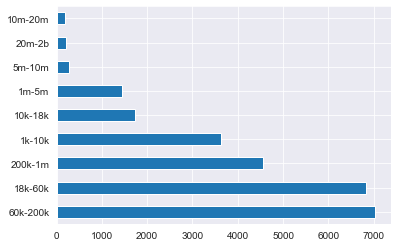

In [137]:
D2['Value'].value_counts().plot.barh();

Investigate Construction See if there is a change in the types of buildings bieng constructed
See the frequency of a specofoc area

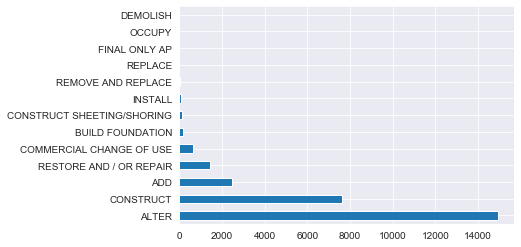

In [138]:
D2['W_type'].value_counts().plot.barh();

In [139]:
permits_by_type = D2.groupby(['U_code']).size()
permits_by_type.sort_values(ascending=False, inplace=True)
permits_by_type.head(5)

U_code
BUSINESS BUILDING                 6926
MULTI-FAMILY DWELLING             4571
COMMERCIAL MISCELLANEOUS STRUC    2840
MERCANTILE BUILDING               2255
TOWNHOUSE                         1688
dtype: int64

In [140]:
filtered_permits = list(permits_by_type.head(5).index)
filtered_permits

['BUSINESS BUILDING',
 'MULTI-FAMILY DWELLING',
 'COMMERCIAL MISCELLANEOUS STRUC',
 'MERCANTILE BUILDING',
 'TOWNHOUSE']

In [141]:
permits_by_type = D2.groupby(['U_code']).size()


Look at construction compared with use code and description

In [142]:
CD = D2.groupby(['W_type', 'U_code']);
CD.first()

A_date  \
W_type                  U_code                                      
ADD                     ASSEMBLY BUILDING              2000-04-11   
                        ASSEMBLY, CHURCHES             2000-11-30   
                        ASSEMBLY, GENERAL              2003-11-21   
                        ASSEMBLY, RESTAURANTS          2004-06-10   
                        ASSEMBLY, THEATERS, W/STAGE    2000-06-19   
                        BANK                           2002-09-30   
                        BIOSCIENCE                     2002-08-01   
                        BOARDING HOUSE                 2001-09-10   
                        BUSINESS                       2008-04-22   
                        BUSINESS BUILDING              2000-01-10   
                        COMMERCIAL MISCELLANEOUS STRUC 2000-02-16   
                        DAY CARE                       2005-07-13   
                        EDUCATIONAL BUILDING           2000-02-09   
                        FACTORY AND INDUST, LOW HAZ    2003-10-02   
                        GARAGE                         2002-06-11   
                        HOSPITAL                       2002-10-02   
                        HOTEL                          2001-01-23   
                        INDUSTRIAL BUILDING            2000-02-22   
                        INSTITUTIONAL BUILDING         2000-03-01   
                        INSTITUTIONAL, NURSING HOMES   2008-03-27   
                        MERCANTILE                     2000-04-24   
                        MERCANTILE BUILDING            2000-01-05   
                        MISCELLANEOUS STRUCTURE        2000-08-24   
                        MODULAR                        2004-02-13   
                        MULTI-FAMILY DWELLING          2000-02-22   
                        MULTI-FAMILY SENIOR CITIZEN BL 2000-04-21   
                        MULTIFAMILY DWELLING HIGH RISE 2016-07-20   
                        MULTIFAMILY DWELLING LOW RISE  2016-03-21   
                        PLACE OF WORSHIP               2000-05-26   
                        PUBLIC UTILITY                 2000-02-18   
...                                                           ...   
REPLACE                 EDUCATIONAL BUILDING           2006-06-21   
                        RETAINING WALL                 2009-06-05   
RESTORE AND / OR REPAIR ASSEMBLY BUILDING              2000-04-26   
                        ASSEMBLY, OUTSIDE ACTIVITY     2007-03-22   
                        BANK                           2007-03-05   
                        BOARDING HOUSE                 2006-09-01   
                        BUSINESS                       2008-10-30   
                        BUSINESS BUILDING              2000-07-31   
                        COMMERCIAL MISCELLANEOUS STRUC 2004-09-17   
                        DECK                           2000-04-27   
                        EDUCATIONAL BUILDING           2000-03-29   
                        GARAGE                         2000-03-03   
                        HOSPITAL                       2011-03-01   
                        HOTEL                          2003-07-09   
                        INDUSTRIAL BUILDING            2010-07-22   
                        INSTITUTIONAL BUILDING         2011-07-27   
                        MERCANTILE BUILDING            2004-05-18   
                        MISCELLANEOUS STRUCTURE        2000-08-15   
                        MULTI-FAMILY DWELLING          2000-06-20   
                        MULTI-FAMILY SENIOR CITIZEN BL 2001-11-30   
                        MULTIFAMILY DWELLING HIGH RISE 2016-08-05   
                        MULTIFAMILY DWELLING LOW RISE  2016-10-17   
                        PLACE OF WORSHIP               2007-02-27   
                        RESTAURANT                     2003-09-08   
                        RETAINING WALL                 2000-06-22   
                        SOIL                           20

In [143]:
D6 = D2.loc[(D2.W_type == 'CONSTRUCT' )]

In [202]:
D6.U_code.value_counts(ascending=False).sum()

7625

In [145]:
D2.iloc[6944,15] 
#Index is off

'ALTER'

In [147]:
D10 = D2.loc[(D2.U_code == 'MULTI-FAMILY SENIOR CITIZEN BL' )]
D10
D6.loc[(D6.U_code == 'MULTI-FAMILY SENIOR CITIZEN BL' )]

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Location,Value
160,213003,Finaled,3116,N/A,GRACEFIELD,RD,N/A,SILVER SPRING,20904,2000-03-06,2000-04-17,2001-07-26 00:00:00,25166.000,2000000.0,N/A,CONSTRUCT,MULTI-FAMILY SENIOR CITIZEN BL,"3116 GRACEFIELD RD\nSILVER SPRING, MD 20904\n(...",1m-5m
608,229458,Finaled,3122,N/A,GRACEFIELD,RD,N/A,SILVER SPRING,20904,2000-09-08,2000-12-13,2001-12-10 00:00:00,150000.000,2000000.0,143 units,CONSTRUCT,MULTI-FAMILY SENIOR CITIZEN BL,"3122 GRACEFIELD RD\nSILVER SPRING, MD 20904\n(...",1m-5m
671,231448,Finaled,18110,N/A,CASHELL,RD,N/A,ROCKVILLE,20853,2000-10-04,2000-10-19,2002-03-04 00:00:00,1300.000,900000.0,M-2002-004 MODIFICATION AND MODIFICATION M-200...,CONSTRUCT,MULTI-FAMILY SENIOR CITIZEN BL,"18110 CASHELL RD\nROCKVILLE, MD 20853\n(39.153...",200k-1m
886,236828,Finaled,3124,N/A,GRACEFIELD,RD,N/A,SILVER SPRING,20904,2000-12-13,2001-03-22,2002-05-08 00:00:00,126085.000,2000000.0,"109 UNITS; U/O#: 209434, 209435",CONSTRUCT,MULTI-FAMILY SENIOR CITIZEN BL,"3124 GRACEFIELD RD\nSILVER SPRING, MD 20904\n(...",1m-5m
1008,240412,Finaled,2100,N/A,OLNEY SANDY SPRING,RD,N/A,OLNEY,20832,2001-02-09,2001-06-08,2002-10-15 00:00:00,41800.000,40000000.0,M-2002-194-IMC 1996,CONSTRUCT,MULTI-FAMILY SENIOR CITIZEN BL,"2100 OLNEY SANDY SPRING RD\nOLNEY, MD 20832\n(...",20m-2b
1705,252377,Finaled,3126,N/A,GRACEFIELD,RD,N/A,SILVER SPRING,20904,2001-07-02,2001-09-27,2003-01-14 00:00:00,30213.000,2000000.0,N/A,CONSTRUCT,MULTI-FAMILY SENIOR CITIZEN BL,"3126 GRACEFIELD RD\nSILVER SPRING, MD 20904\n(...",1m-5m
1805,255480,Finaled,3210,N/A,NORBECK,RD,N/A,SILVER SPRING,20906,2001-08-07,2002-11-07,2015-02-04 00:00:00,128773.000,7400000.0,MODIFICATION M-2003-135 1996 BOCA SEC. 512.1 &...,CONSTRUCT,MULTI-FAMILY SENIOR CITIZEN BL,"3210 NORBECK RD\nSILVER SPRING, MD 20906\n(39....",5m-10m
2027,260632,Finaled,3128,N/A,GRACEFIELD,RD,N/A,SILVER SPRING,20904,2001-10-11,2002-03-25,2003-06-11 00:00:00,28600.000,2000000.0,U&O 214061,CONSTRUCT,MULTI-FAMILY SENIOR CITIZEN BL,"3128 GRACEFIELD RD\nSILVER SPRING, MD 20904\n(...",1m-5m
2907,282633,Finaled,9701,N/A,WINERY,CT,N/A,GAITHERSBURG,20879,2002-07-15,2002-09-23,2005-10-04 00:00:00,1018.000,25000.0,RECEPTION HALL,CONSTRUCT,MULTI-FAMILY SENIOR CITIZEN BL,"9701 WINERY CT\nGAITHERSBURG, MD 20879\n(39.19...",18k-60k
2908,282634,Finaled,9711,N/A,WINERY,CT,N/A,GAITHERSBURG,20879,2002-07-15,2002-09-23,2005-10-04 00:00:00,1485.000,25000.0,N/A,CONSTRUCT,MULTI-FAMILY SENIOR CITIZEN BL,"9711 WINERY CT\nGAITHERSBURG, MD 20879\n(39.19...",18k-60k


Dennis said some of the permit locations are off how to fix that each permit should line up with its zip code

# Visulaztion

In [148]:
Construction = D2.groupby

In [149]:
#sns.catplot(x="Status", kind="count", palette="ch:.25", data=D2);

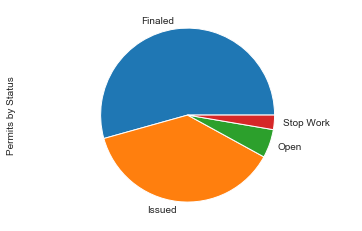

In [150]:
permits_by_status = D2.groupby(D2['Status']).size()
plt.axis('equal') 
permits_by_status.plot(kind='pie', legend=False, label='Permits by Status');

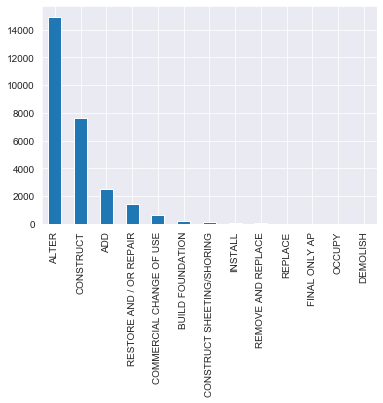

In [151]:
D2['W_type'].value_counts().plot.bar();

In [152]:
#Make a frequcny of th3

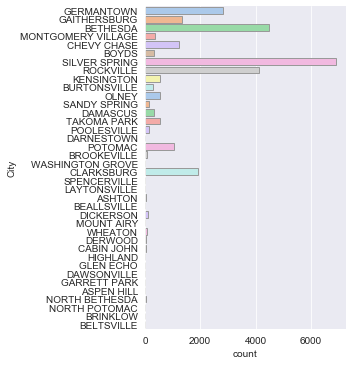

In [153]:
sns.catplot(y="City",  kind="count",
            palette="pastel", edgecolor=".6",
            data=D2);

The department of permiting Issue 79.4 days as the Average:
https://stat.montgomerycountymd.gov/stories/s/Department-of-Permitting-Services-DPS-/qaet-mgd9
null 79 

In [154]:
D3 = D2.assign(wait_time = (D2['I_date'] - D2['A_date']).dt.days)


In [155]:
D3['month'] = D3['A_date'].dt.month
D3['year'] = D3['A_date'].dt.year

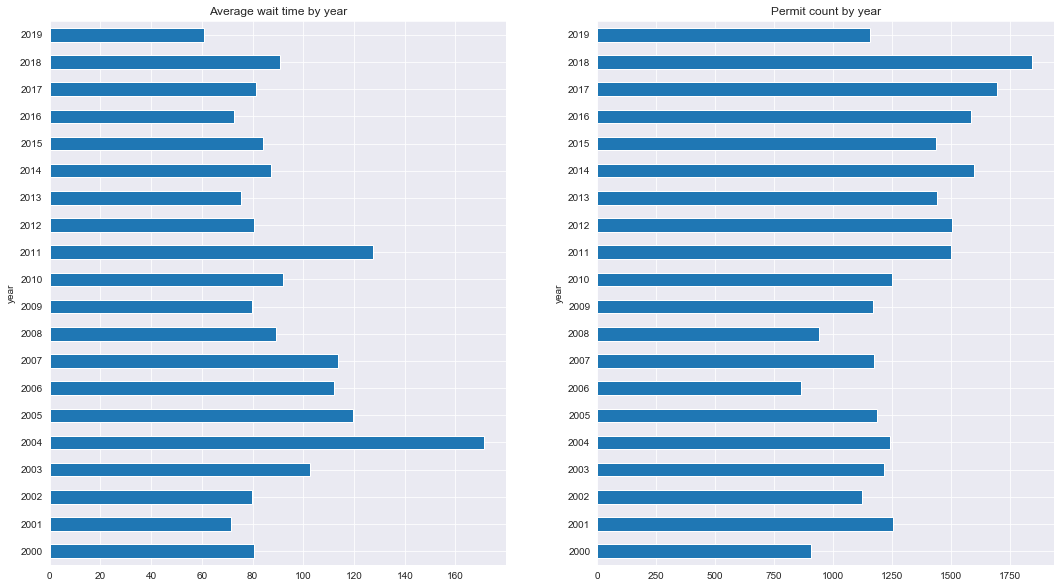

In [156]:
_ = plt.figure(figsize=(18,10))
_ = plt.subplot(1,2,1)
_ = (D3.groupby('year').wait_time.mean()).plot.barh()
_ = plt.title('Average wait time by year')
_ = plt.subplot(1,2,2)
_ = (D3.groupby('year').wait_time.count()).plot.barh()
_ = plt.title('Permit count by year')
#Write a result

In [157]:
(D3.groupby('year').wait_time.mean())


year
2000     80.411894
2001     71.707337
2002     79.648841
2003    102.808230
2004    171.385852
2005    119.729798
2006    112.147161
2007    113.519558
2008     89.181915
2009     79.608027
2010     91.859200
2011    127.611851
2012     80.542497
2013     75.584200
2014     87.104506
2015     84.302293
2016     72.584227
2017     81.320165
2018     90.871073
2019     60.782872
Name: wait_time, dtype: float64

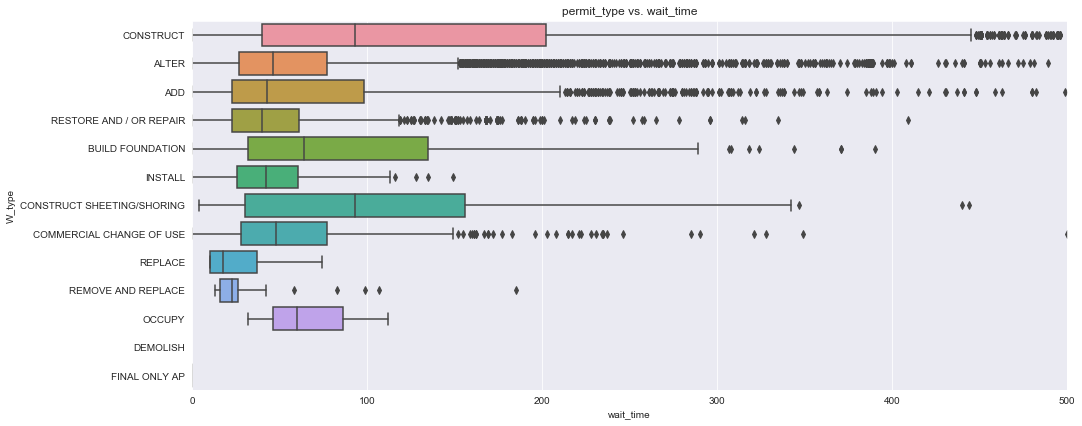

In [158]:
_ = plt.figure(figsize=(15,6))
ax = sns.boxplot(y='W_type', x='wait_time', data = D3, orient = 'h');
plt.title('permit_type vs. wait_time');
plt.tight_layout(pad=1)
plt.xlim(0, 500)
plt.show()


In [159]:
D3

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,...,Building_area,Decl_v,Desc,W_type,U_code,Location,Value,wait_time,month,year
0,208677,Finaled,19850,N/A,CENTURY,BLVD,N/A,GERMANTOWN,20874,2000-01-03,...,42600.0,1000000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"19850 CENTURY BLVD\nGERMANTOWN, MD 20874\n(39....",200k-1m,346.0,1,2000
1,208678,Finaled,12901,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,...,42600.0,1000000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12901 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1...",200k-1m,346.0,1,2000
2,208679,Finaled,12903,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,...,42600.0,1000000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12903 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1...",200k-1m,346.0,1,2000
3,208689,Finaled,12907,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,...,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12907 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1...",1m-5m,346.0,1,2000
4,208690,Finaled,12909,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,...,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12909 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1...",1m-5m,346.0,1,2000
5,208691,Finaled,12925,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,...,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12925 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1...",1m-5m,346.0,1,2000
6,208692,Issued,12935,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,...,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12935 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1...",1m-5m,346.0,1,2000
7,208716,Finaled,16507,S,FREDERICK,AVE,N/A,GAITHERSBURG,20877,2000-01-03,...,3000.0,10000.00,N/A,ALTER,BUSINESS BUILDING,"16507 FREDERICK AVE\nGAITHERSBURG, MD 20877\n(...",1k-10k,0.0,1,2000
8,208739,Finaled,8600,N/A,OLD GEORGETOWN,RD,N/A,BETHESDA,20817,2000-01-04,...,10350.0,110000.00,"the applicant call on Wednesday, January 12, 2...",ALTER,INSTITUTIONAL BUILDING,"8600 OLD GEORGETOWN RD\nBETHESDA, MD 20817\n(3...",60k-200k,23.0,1,2000
9,208772,Finaled,12955,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-04,...,36400.0,750000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,"12955 PINNACLE DR\nGERMANTOWN, MD 20874\n(39.1...",200k-1m,345.0,1,2000


In [160]:

D3['year'], D3['month'], D3['day_of_week'] = D3.A_date.dt.year, D3.A_date.dt.month, D3.A_date.dt.dayofweek

Select this year and this year

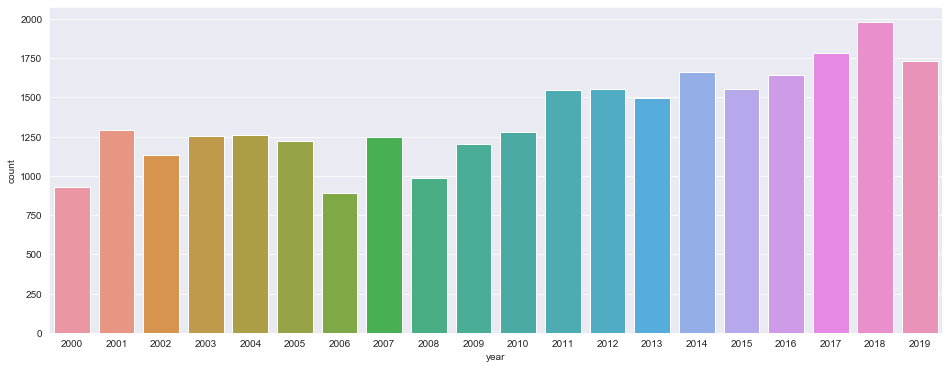

In [204]:
plt.figure(figsize=(16, 6))
sns.countplot(x="year", data=D3);

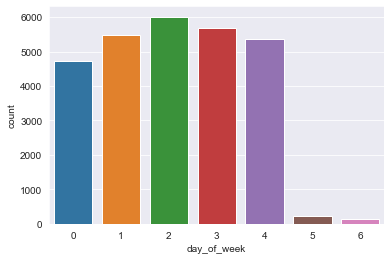

In [167]:
sns.countplot(x="day_of_week", data=D3);

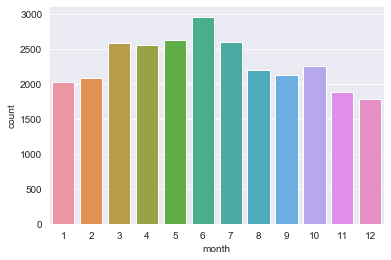

In [168]:
sns.countplot(x="month", data=D3);

In [169]:
D3.groupby('year').P_num.count()

year
2000     926
2001    1289
2002    1134
2003    1256
2004    1258
2005    1220
2006     892
2007    1249
2008     989
2009    1202
2010    1279
2011    1546
2012    1554
2013    1493
2014    1663
2015    1554
2016    1641
2017    1780
2018    1979
2019    1729
Name: P_num, dtype: int64

In [171]:
DTime = D3.set_index('A_date')

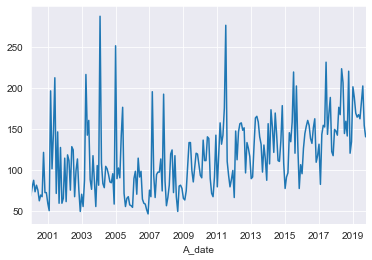

In [172]:
DTime['num'] = 1
DTime['num'].resample('M').sum().plot();

In [ ]:
#what caused the big spike in 2011

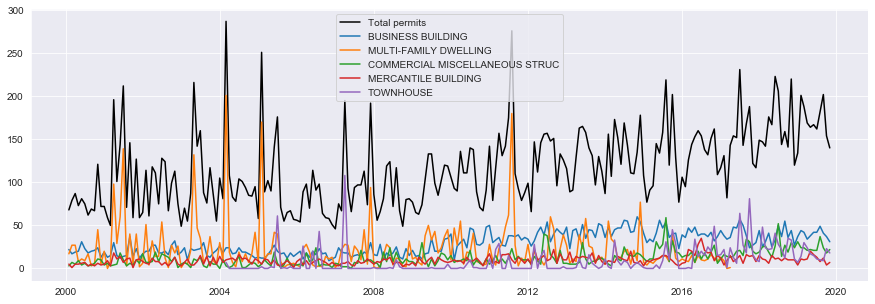

In [208]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(DTime['num'].resample('M').sum(), 'k', label='Total permits')
for use_code in filtered_permits:
    x = DTime[DTime.U_code == use_code]['num'].resample('M').sum()
    ax.plot(x, label=use_code)
ax.legend();

In [174]:
E2 = D2.Location.str.split("(", n =1, expand = True)
# making separate logitude/ladditude column from new data frame 
D2["Address"]= E2[0] 
  
# making separate Address column from new data frame 
D2["LL"]= E2[1] 
  
# Dropping old Name columns 
D2.drop(columns =["Location"], inplace = True) 
# adding pertheses back in
# df display 
D2 

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,I_date,F_date,Building_area,Decl_v,Desc,W_type,U_code,Value,Address,LL
0,208677,Finaled,19850,N/A,CENTURY,BLVD,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-10 00:00:00,42600.0,1000000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,200k-1m,"19850 CENTURY BLVD\nGERMANTOWN, MD 20874\n","39.181866, -77.26558)"
1,208678,Finaled,12901,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-11 00:00:00,42600.0,1000000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,200k-1m,"12901 PINNACLE DR\nGERMANTOWN, MD 20874\n","39.182081, -77.265196)"
2,208679,Finaled,12903,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2001-10-12 00:00:00,42600.0,1000000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,200k-1m,"12903 PINNACLE DR\nGERMANTOWN, MD 20874\n","39.182361, -77.265512)"
3,208689,Finaled,12907,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-31 00:00:00,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,1m-5m,"12907 PINNACLE DR\nGERMANTOWN, MD 20874\n","39.182922, -77.266143)"
4,208690,Finaled,12909,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-29 00:00:00,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,1m-5m,"12909 PINNACLE DR\nGERMANTOWN, MD 20874\n","39.183215, -77.266444)"
5,208691,Finaled,12925,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,2002-01-25 00:00:00,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,1m-5m,"12925 PINNACLE DR\nGERMANTOWN, MD 20874\n","39.183411, -77.266188)"
6,208692,Issued,12935,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,2000-12-14,N/A,63300.0,1500000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,1m-5m,"12935 PINNACLE DR\nGERMANTOWN, MD 20874\n","39.18353, -77.265984)"
7,208716,Finaled,16507,S,FREDERICK,AVE,N/A,GAITHERSBURG,20877,2000-01-03,2000-01-03,2000-01-19 00:00:00,3000.0,10000.00,N/A,ALTER,BUSINESS BUILDING,1k-10k,"16507 FREDERICK AVE\nGAITHERSBURG, MD 20877\n","39.127932, -77.18505)"
8,208739,Finaled,8600,N/A,OLD GEORGETOWN,RD,N/A,BETHESDA,20817,2000-01-04,2000-01-27,2000-10-31 00:00:00,10350.0,110000.00,"the applicant call on Wednesday, January 12, 2...",ALTER,INSTITUTIONAL BUILDING,60k-200k,"8600 OLD GEORGETOWN RD\nBETHESDA, MD 20817\n","38.997251, -77.10922)"
9,208772,Finaled,12955,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-04,2000-12-14,2001-12-21 00:00:00,36400.0,750000.00,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,200k-1m,"12955 PINNACLE DR\nGERMANTOWN, MD 20874\n","39.18377, -77.265575)"


# MAP

making a map what I Want 
1. To show the concotration of permits
2. To show a Differicen in the the types of permits bieng done 
3. Showing a map of open permits 
4. Showing a map of finalled
5. Show map with type of construction 
6. Make a heat map
7. compare two different years 
8. show Solar panels
9. show a map by highest value
 

In [175]:
E2 = D2.LL.str.split(",", n =1, expand = True)
# making separate latitude column from new data frame 
D2["Lat"]= E2[0] 
  
# making separate logitude column from new data frame 
D2["Lon"]= E2[1] 

D2["Lat"]= D2.Lat.str.strip('(') 
D2["Lon"]= D2.Lon.str.strip(')') 

In [176]:
Seeing the Address which have the most permits
Ad = D2.Address.value_counts()
Ad.head(11).sum()
Ad.head(11)
# 1225 Permits so about 4.5 Percent of total permits

7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n         264
11160 VEIRS MILL RD\nSILVER SPRING, MD 20902\n    199
8500 RIVER RD\nBETHESDA, MD 20817\n               133
22705 CLARKSBURG RD\nBOYDS, MD 20841\n            119
1500 FOREST GLEN RD\nSILVER SPRING, MD 20910\n     91
8600 OLD GEORGETOWN RD\nBETHESDA, MD 20817\n       88
9901 MEDICAL CENTER DR\nROCKVILLE, MD 20850\n      74
7315 WISCONSIN AVE\nCHEVY CHASE, MD 20815          68
5454 WISCONSIN AVE\nCHEVY CHASE, MD 20815\n        65
8661 COLESVILLE RD\nSILVER SPRING, MD 20910\n      64
9800 MEDICAL CENTER DR\nROCKVILLE, MD 20850\n      60
Name: Address, dtype: int64

1. 7101 DEMOCRACY BLVD BETHESDA, MD 20817 = Westfield Montgomery (Mall)
2. 11160 VEIRS MILL RD SILVER SPRING, MD 20902 = Westfield Wheaton (Mall)
3. 8500 RIVER RD BETHESDA, MD 20817 = Congressional Country Club
4. 22705 CLARKSBURG RD BOYDS, MD 20841 = Clarksburg Premium Outlets
5. 1500 FOREST GLEN RD SILVER SPRING, MD 20910 = Holy Cross Hospital
6. 8600 OLD GEORGETOWN RD BETHESDA, MD 20817 = John Hopkins Suburban Hospital
7. 9901 MEDICAL CENTER DR ROCKVILLE, MD 20850 = Adventist Healthcare Center
8. 7315 WISCONSIN AVE CHEVY CHASE, MD 20815 = Johns Hopkins Bethesda
9. 5454 Wisconsin Ave, Chevy Chase, MD 20815 = Barlow Building; MedStar Health
10. 8661 COLESVILLE RD SILVER SPRING, MD 20910 = Ellsworth Place (Mall)
11. 9800 MEDICAL CENTER DR ROCKVILLE, MD 20850 = Adventist Medical Center   

In [78]:
 D2.loc[(D2.Address == '7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n' )]

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,...,F_date,Building_area,Decl_v,Desc,W_type,U_code,Address,LL,Lat,Lon
400,220714,Issued,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,06/06/2000,...,N/A,10.0,100000.00,ALTER AND FACADE==NO CHANGE OF USE===SPACE 2702,ALTER,RESTAURANT,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n","39.0242, -77.1459)",39.0242,-77.1459
447,222116,Issued,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,06/22/2000,...,N/A,1200.0,0.00,N/A,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n","39.0242, -77.1459)",39.0242,-77.1459
546,226157,Finaled,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,08/10/2000,...,06/05/2001,151807.0,3000000.00,ALL INTERIOR==RENOVATION OF VACATED JC PENNY S...,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n","39.0242, -77.1459)",39.0242,-77.1459
789,233887,Finaled,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,11/01/2000,...,10/01/2001,0.0,12000.00,TRASH ENCLOSURE AT LEGAL SEAFOOD SPACE 2702,ADD,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n","39.0242, -77.1459)",39.0242,-77.1459
795,234079,Issued,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,11/03/2000,...,N/A,0.0,250000.00,MECHANICAL AND ARCHITECTURAL REVISION ONLY,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n","39.0242, -77.1459)",39.0242,-77.1459
809,234582,Issued,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,11/09/2000,...,N/A,0.0,1.00,STRUCTURAL REVISION ONLY,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n","39.0242, -77.1459)",39.0242,-77.1459
982,239380,Issued,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,01/29/2001,...,N/A,0.0,50000.00,MECHANICAL/STRUCTURAL REVISION,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n","39.0242, -77.1459)",39.0242,-77.1459
1264,244959,Issued,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,04/09/2001,...,N/A,151807.0,250.00,REVISION,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n","39.0242, -77.1459)",39.0242,-77.1459
1801,255463,Finaled,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,08/07/2001,...,11/13/2002,197000.0,4000000.00,INTERIOR RENOVATION ONLY...HECHT'S DEPARTMENT ...,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n","39.0242, -77.1459)",39.0242,-77.1459
2169,264234,Issued,7101,N/A,DEMOCRACY,BLVD,N/A,BETHESDA,20817,11/27/2001,...,N/A,3194.0,65000.00,BOSE PLAZA STORE,ALTER,MERCANTILE BUILDING,"7101 DEMOCRACY BLVD\nBETHESDA, MD 20817\n","39.0242, -77.1459)",39.0242,-77.1459


In [80]:
D2.loc[(D2.Address == '8500 RIVER RD\nBETHESDA, MD 20817\n' )]

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,...,F_date,Building_area,Decl_v,Desc,W_type,U_code,Address,LL,Lat,Lon
1883,256409,Finaled,8500,N/A,RIVER,RD,N/A,BETHESDA,20817,08/16/2001,...,08/29/2002,23097.00,800000.0,"M-2001-238, M-2001-239",CONSTRUCT,ASSEMBLY BUILDING,"8500 RIVER RD\nBETHESDA, MD 20817\n","38.999234, -77.17405)",38.999234,-77.17405
4546,326920,Issued,8500,N/A,RIVER,RD,N/A,BETHESDA,20817,12/08/2003,...,N/A,2330.00,24000.0,Senate Pub - Congressional Country Club ******...,ALTER,ASSEMBLY BUILDING,"8500 RIVER RD\nBETHESDA, MD 20817\n","38.999234, -77.17405)",38.999234,-77.17405
5605,357483,Issued,8500,N/A,RIVER,RD,N/A,BETHESDA,20817,09/08/2004,...,N/A,12500.00,850000.0,1st flr clubhouse,ALTER,ASSEMBLY BUILDING,"8500 RIVER RD\nBETHESDA, MD 20817\n","38.999234, -77.17405)",38.999234,-77.17405
6499,383312,Finaled,8500,N/A,RIVER,RD,N/A,BETHESDA,20817,05/13/2005,...,06/09/2005,5600.00,12000.0,Temporary tent for Booz Allen Classic (Golf to...,CONSTRUCT,COMMERCIAL MISCELLANEOUS STRUC,"8500 RIVER RD\nBETHESDA, MD 20817\n","38.999234, -77.17405)",38.999234,-77.17405
6500,383314,Finaled,8500,N/A,RIVER,RD,N/A,BETHESDA,20817,05/13/2005,...,06/09/2005,10000.00,20000.0,Temporary tent for Booz Allen Classic (Golf to...,CONSTRUCT,COMMERCIAL MISCELLANEOUS STRUC,"8500 RIVER RD\nBETHESDA, MD 20817\n","38.999234, -77.17405)",38.999234,-77.17405
6501,383315,Finaled,8500,N/A,RIVER,RD,N/A,BETHESDA,20817,05/13/2005,...,06/09/2005,4500.00,10000.0,Temporary tent for Booz Allen Classic (Golf to...,CONSTRUCT,COMMERCIAL MISCELLANEOUS STRUC,"8500 RIVER RD\nBETHESDA, MD 20817\n","38.999234, -77.17405)",38.999234,-77.17405
6502,383316,Finaled,8500,N/A,RIVER,RD,N/A,BETHESDA,20817,05/13/2005,...,06/09/2005,7342.00,15000.0,Temporary tent for Booz Allen Classic (Golf to...,CONSTRUCT,COMMERCIAL MISCELLANEOUS STRUC,"8500 RIVER RD\nBETHESDA, MD 20817\n","38.999234, -77.17405)",38.999234,-77.17405
6503,383317,Finaled,8500,N/A,RIVER,RD,N/A,BETHESDA,20817,05/13/2005,...,06/09/2005,1800.00,4000.0,Temporary tent for Booz Allen Classic (Golf to...,CONSTRUCT,COMMERCIAL MISCELLANEOUS STRUC,"8500 RIVER RD\nBETHESDA, MD 20817\n","38.999234, -77.17405)",38.999234,-77.17405
6504,383318,Finaled,8500,N/A,RIVER,RD,N/A,BETHESDA,20817,05/13/2005,...,06/09/2005,4400.00,10000.0,Temporary tent for Booz Allen Classic (Golf to...,CONSTRUCT,COMMERCIAL MISCELLANEOUS STRUC,"8500 RIVER RD\nBETHESDA, MD 20817\n","38.999234, -77.17405)",38.999234,-77.17405
6505,383319,Finaled,8500,N/A,RIVER,RD,N/A,BETHESDA,20817,05/13/2005,...,06/09/2005,3200.00,10000.0,Temporary tent for Booz Allen Classic (Golf to...,CONSTRUCT,COMMERCIAL MISCELLANEOUS STRUC,"8500 RIVER RD\nBETHESDA, MD 20817\n","38.999234, -77.17405)",38.999234,-77.17405


In [81]:
D2.loc[(D2.Address == '1500 FOREST GLEN RD\nSILVER SPRING, MD 20910\n')] 
#add aLTER

,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,...,F_date,Building_area,Decl_v,Desc,W_type,U_code,Address,LL,Lat,Lon
285,217321,Finaled,1500,N/A,FOREST GLEN,RD,N/A,SILVER SPRING,20910,04/25/2000,...,11/27/2000,27885.000,168677.0,INTERIOR WORK ONLY,ALTER,INSTITUTIONAL BUILDING,"1500 FOREST GLEN RD\nSILVER SPRING, MD 20910\n","39.016011, -77.035469)",39.016011,-77.035469
371,219682,Finaled,1500,N/A,FOREST GLEN,RD,N/A,SILVER SPRING,20910,05/24/2000,...,12/13/2000,27885.000,350000.0,INTERIOR ALTERATION ONLY,ALTER,INSTITUTIONAL BUILDING,"1500 FOREST GLEN RD\nSILVER SPRING, MD 20910\n","39.016011, -77.035469)",39.016011,-77.035469
1637,250971,Finaled,1500,N/A,FOREST GLEN,RD,N/A,SILVER SPRING,20910,06/14/2001,...,03/15/2002,37690.000,55000000.0,PARKING GARAGE,CONSTRUCT,GARAGE,"1500 FOREST GLEN RD\nSILVER SPRING, MD 20910\n","39.016011, -77.035469)",39.016011,-77.035469
1827,255982,Issued,1500,N/A,FOREST GLEN,RD,N/A,SILVER SPRING,20910,08/13/2001,...,N/A,7093.000,575000.0,ALL INTERIOR,ALTER,INSTITUTIONAL BUILDING,"1500 FOREST GLEN RD\nSILVER SPRING, MD 20910\n","39.016011, -77.035469)",39.016011,-77.035469
2005,260248,Issued,1500,N/A,FOREST GLEN,RD,N/A,SILVER SPRING,20910,10/08/2001,...,N/A,237.000,62500.0,UNMANNED EQUIPMENT SHELTER-ROOFTOP UNIT (ANTEN...,ADD,INSTITUTIONAL BUILDING,"1500 FOREST GLEN RD\nSILVER SPRING, MD 20910\n","39.016011, -77.035469)",39.016011,-77.035469
2006,260250,Issued,1500,N/A,FOREST GLEN,RD,N/A,SILVER SPRING,20910,10/08/2001,...,N/A,237.000,62500.0,INSTALLING 12 PANEL ANTENNAS ON EXISTING PENTH...,ADD,COMMERCIAL MISCELLANEOUS STRUC,"1500 FOREST GLEN RD\nSILVER SPRING, MD 20910\n","39.016011, -77.035469)",39.016011,-77.035469
2294,268029,Finaled,1500,N/A,FOREST GLEN,RD,N/A,SILVER SPRING,20910,01/25/2002,...,05/30/2003,39600.000,2088497.0,HOLY CROSS HOSPITAL - VERTICAL EXPANSION CORE ...,ADD,INSTITUTIONAL BUILDING,"1500 FOREST GLEN RD\nSILVER SPRING, MD 20910\n","39.016011, -77.035469)",39.016011,-77.035469
2425,270819,Finaled,1500,N/A,FOREST GLEN,RD,N/A,SILVER SPRING,20910,03/01/2002,...,06/14/2004,2035.000,5000000.0,N/A,ADD,INDUSTRIAL BUILDING,"1500 FOREST GLEN RD\nSILVER SPRING, MD 20910\n","39.016011, -77.035469)",39.016011,-77.035469
2426,270820,Finaled,1500,N/A,FOREST GLEN,RD,N/A,SILVER SPRING,20910,03/01/2002,...,09/05/2003,8280.000,740000.0,"CODE MODIFICATION-M-2003-71\n2000 IBC, 1003.2....",CONSTRUCT,RETAINING WALL,"1500 FOREST GLEN RD\nSILVER SPRING, MD 20910\n","39.016011, -77.035469)",39.016011,-77.035469
2516,272726,Finaled,1500,N/A,FOREST GLEN,RD,N/A,SILVER SPRING,20910,03/25/2002,...,07/03/2002,2100.000,50000.0,Holy Cross Hospital-Construction Office Traile...,CONSTRUCT,TRAILER,"1500 FOREST GLEN RD\nSILVER SPRING, MD 20910\n","39.016011, -77.035469)",39.016011,-77.035469


 # Statistical analysis

1. calulate if there is a correlation between two types of structures if one was built is it likely another type of building will be built
2. potential calculate if how long it would take for a permit to get approved
3. If an area was more likely to have a type of construction so guess filter by region and then get wotk type

Seeing if there is a connection between work type and valuation


In [62]:
filtered_permits = list(permits_by_type.head(5).index)
filtered_permits

['BUSINESS BUILDING',
 'MULTI-FAMILY DWELLING',
 'COMMERCIAL MISCELLANEOUS STRUC',
 'MERCANTILE BUILDING',
 'TOWNHOUSE']

In [177]:
filtered_df = D2.loc[D2['U_code'].isin(filtered_permits)]
filtered_df.head()


,P_num,Status,St_num,Pre_d,St_name,St_suf,Post_d,City,Zip,A_date,...,Building_area,Decl_v,Desc,W_type,U_code,Value,Address,LL,Lat,Lon
0,208677,Finaled,19850,N/A,CENTURY,BLVD,N/A,GERMANTOWN,20874,2000-01-03,...,42600.0,1000000.0,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,200k-1m,"19850 CENTURY BLVD\nGERMANTOWN, MD 20874\n","39.181866, -77.26558)",39.181866,-77.26558
1,208678,Finaled,12901,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,...,42600.0,1000000.0,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,200k-1m,"12901 PINNACLE DR\nGERMANTOWN, MD 20874\n","39.182081, -77.265196)",39.182081,-77.265196
2,208679,Finaled,12903,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,...,42600.0,1000000.0,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,200k-1m,"12903 PINNACLE DR\nGERMANTOWN, MD 20874\n","39.182361, -77.265512)",39.182361,-77.265512
3,208689,Finaled,12907,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,...,63300.0,1500000.0,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,1m-5m,"12907 PINNACLE DR\nGERMANTOWN, MD 20874\n","39.182922, -77.266143)",39.182922,-77.266143
4,208690,Finaled,12909,N/A,PINNACLE,DR,N/A,GERMANTOWN,20874,2000-01-03,...,63300.0,1500000.0,N/A,CONSTRUCT,MULTI-FAMILY DWELLING,1m-5m,"12909 PINNACLE DR\nGERMANTOWN, MD 20874\n","39.183215, -77.266444)",39.183215,-77.266444


In [178]:
CH = filtered_df[['U_code', 'Value']]
CH.head()

,U_code,Value
0,MULTI-FAMILY DWELLING,200k-1m
1,MULTI-FAMILY DWELLING,200k-1m
2,MULTI-FAMILY DWELLING,200k-1m
3,MULTI-FAMILY DWELLING,1m-5m
4,MULTI-FAMILY DWELLING,1m-5m


In [189]:
CH['U_code'].value_counts()
# Total permits 18280 about 67 percent of all permits so a good represntation 

BUSINESS BUILDING                 6926
MULTI-FAMILY DWELLING             4571
COMMERCIAL MISCELLANEOUS STRUC    2840
MERCANTILE BUILDING               2255
TOWNHOUSE                         1688
Name: U_code, dtype: int64

H0:There is no statistically significant relationship between the Use code and the value of of a permit.
Ha:There is a statistically significant relationship between the Use code and the value of a permit.

In [190]:
contingency_table = pd.crosstab(
    CH['U_code'],
    CH['Value'],
    margins = False
)
contingency_table

Value,1k-10k,10k-18k,18k-60k,60k-200k,200k-1m,1m-5m,5m-10m,10m-20m,20m-2b
U_code,,,,,,,,,
BUSINESS BUILDING,630,451,1761,1755,1482,389,60,40,31
COMMERCIAL MISCELLANEOUS STRUC,771,419,1025,296,147,41,2,4,3
MERCANTILE BUILDING,280,118,531,609,421,122,13,8,8
MULTI-FAMILY DWELLING,597,164,1058,1301,536,289,34,27,48
TOWNHOUSE,95,22,30,994,529,7,0,0,0


In [183]:
#Assigns the frequency values
Businesscount = contingency_table.iloc[0][0:9].values
Misccount = contingency_table.iloc[1][0:9].values
Merchcount = contingency_table.iloc[2][0:9].values
M_Familycount = contingency_table.iloc[3][0:9].values
TownHcount = contingency_table.iloc[4][0:9].values


In [182]:
f_obs = np.append(contingency_table.iloc[0][0:9].values,
                  contingency_table.iloc[1][0:9].values,
                  contingency_table.iloc[2][0:9].values,
                  contingency_table.iloc[3][0:9].values,
                  contingency_table.iloc[4][0:9].values )
f_obs

TypeError: append() takes from 2 to 3 positional arguments but 5 were given

In [191]:
from scipy import stats
stats.chi2_contingency(contingency_table)

(3235.435109340174,
 0.0,
 32,
 array([[ 913.19261721,  451.78598087, 1695.15949382, 1906.81391416,
         1198.73367157,  326.33263354,   41.94605785,   30.40127129,
           34.63435969],
        [ 374.74247726,  185.39724749,  695.63447632,  782.49008631,
          491.91859109,  133.91555867,   17.21320271,   12.47562398,
           14.21273618],
        [ 291.98915325,  144.45649638,  542.01947749,  609.69500816,
          383.28959645,  104.34336366,   13.41205972,    9.72066713,
           11.07417775],
        [ 561.00664801,  277.54816888, 1041.39666433, 1171.42348962,
          736.42465594,  200.47772335,   25.76895265,   18.67658036,
           21.27711686],
        [ 232.06910427,  114.81210637,  430.78988803,  484.57750175,
          304.63348495,   82.93072078,   10.65972708,    7.72585724,
            8.80160952]]))

In [ ]:
#want to see if there is  an increase in senoir living

In [201]:
DA = pd.read_csv('data.csv')
DA
#DA.PopTotal.sum()

,Name,Census,PopTotal,Growth,GrowthRate
0,Gaithersburg,59905,67776,7871,0.1314
1,Rockville,61250,66940,5690,0.0929
2,Takoma Park,16722,17765,1043,0.0624
3,Poolesville,4854,5190,336,0.0692
4,Chevy Chase,2824,2989,165,0.0584
5,Kensington,2239,2379,140,0.0625
6,Chevy Chase Village,1951,2062,111,0.0569
7,Somerset,1200,1277,77,0.0642
8,Garrett Park,987,1046,59,0.0598
9,Martin's Additions,941,997,56,0.0595


In [211]:

#df_anova = df_anova[['weight','group']]
#grps = pd.unique(df_anova.group.values)
#d_data = {grp:df_anova['weight'][df_anova.group == grp] for grp in grps}
 
#F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])
#print("p-value for significance is: ", p)
#if p<0.05:
    #print("reject null hypothesis")
#else:
    #print("accept null hypothesis")


IndentationError: unexpected indent (<ipython-input-211-f3c4fa304e83>, line 8)

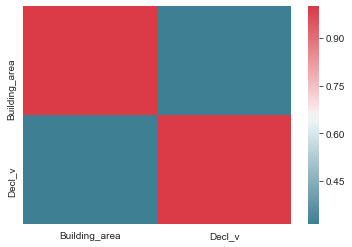

In [199]:
corr = D2.loc[:,D2.dtypes == 'float64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True));

In [ ]:
#Make values for each city
